# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Adrian Putra Ramadhan
- Email: adrianramadhan881@gmail.com
- Id Dicoding: adrian_ramadhan

## Persiapan

### Menyiapkan library yang dibutuhkan

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import joblib

### Menyiapkan data yang akan diguankan

## Data Understanding

In [23]:
# Menyiapkan data
file_path = './employee_data.csv'
df = pd.read_csv(file_path)

In [24]:
# Menampilkan informasi awal tentang data
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())
print("\nDescriptive statistics:")
print(df.describe())

Shape: (1470, 35)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-nul

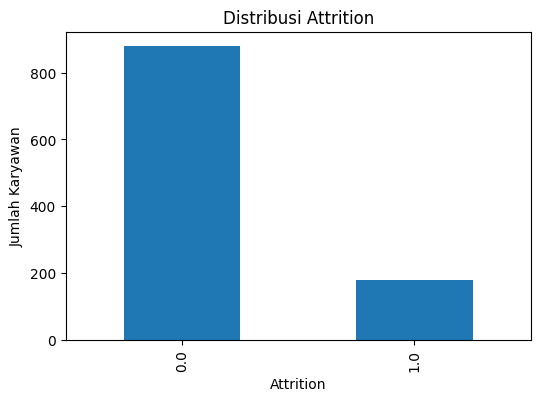

In [25]:
# Plot distribusi target 'Attrition'
if 'Attrition' in df.columns:
    counts = df['Attrition'].value_counts()
    plt.figure(figsize=(6,4))
    counts.plot(kind='bar')
    plt.title('Distribusi Attrition')
    plt.ylabel('Jumlah Karyawan')
    plt.xlabel('Attrition')
    plt.show()

## Data Preparation / Preprocessing

In [26]:
# Data Preparation / Preprocessing
df_clean = df.dropna()
le = LabelEncoder()

df_clean.isnull().sum()

EmployeeId                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [27]:
for col in df_clean.select_dtypes(include=['object']).columns:
    df_clean[col] = le.fit_transform(df_clean[col])

C:\Users\asus\AppData\Local\Temp\ipykernel_16300\2191370239.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = le.fit_transform(df_clean[col])
C:\Users\asus\AppData\Local\Temp\ipykernel_16300\2191370239.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = le.fit_transform(df_clean[col])
C:\Users\asus\AppData\Local\Temp\ipykernel_16300\2191370239.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [28]:
X = df_clean.drop('Attrition', axis=1)
y = df_clean['Attrition']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [29]:
scaler = StandardScaler()
numeric_feats = X.select_dtypes(include=[np.number]).columns
X_train[numeric_feats] = scaler.fit_transform(X_train[numeric_feats])
X_test[numeric_feats] = scaler.transform(X_test[numeric_feats])

## Modeling

In [30]:
# Modeling
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluation

In [31]:
for name, model in [('Logistic Regression', lr), ('Random Forest', rf)]:
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    print(f"=== {name} ===")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_proba))
    print()

=== Logistic Regression ===
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91       176
         1.0       0.60      0.42      0.49        36

    accuracy                           0.85       212
   macro avg       0.74      0.68      0.70       212
weighted avg       0.84      0.85      0.84       212

Confusion Matrix:
 [[166  10]
 [ 21  15]]
ROC AUC: 0.8120265151515152

=== Random Forest ===
              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91       176
         1.0       0.67      0.06      0.10        36

    accuracy                           0.83       212
   macro avg       0.75      0.52      0.51       212
weighted avg       0.81      0.83      0.77       212

Confusion Matrix:
 [[175   1]
 [ 34   2]]
ROC AUC: 0.7925347222222222

